<a href="https://colab.research.google.com/github/Abrar171041075/Deep-Learning/blob/main/VGG16%20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/kaggle_dataset/cat-and-dogs/dataset/training_set",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/kaggle_dataset/cat-and-dogs/dataset/test_set", target_size=(224,224))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


In [19]:
from keras.backend import learning_phase
model.compile(optimizer = 'adam',
             loss = "categorical_crossentropy",
             metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [22]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 1021.5320 - accuracy: 0.5000 

10/10 [==============================] - 484s 49s/step - loss: 1021.5320 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4844
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.4812 

10/10 [==============================] - 453s 45s/step - loss: 0.7150 - accuracy: 0.4812 - val_loss: 0.6953 - val_accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.5594 

10/10 [==============================] - 433s 43s/step - loss: 0.6962 - accuracy: 0.5594 - val_loss: 0.6956 - val_accuracy: 0.4625
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5250 

10/10 [==============================] - 407s 40s/step - loss: 0.6928 - accuracy: 0.5250 - val_loss: 0.6941 - val_accuracy: 0.4812
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5188 

10/10 [==============================] - 401s 40s/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6965 - val_accuracy: 0.4563
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5125 

10/10 [==============================] - 394s 39s/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6965 - val_accuracy: 0.4625
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.4719 

10/10 [==============================] - 395s 39s/step - loss: 0.6956 - accuracy: 0.4719 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4719 

10/10 [==============================] - 395s 39s/step - loss: 0.6933 - accuracy: 0.4719 - val_loss: 0.6933 - val_accuracy: 0.4719
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5437 

10/10 [==============================] - 393s 39s/step - loss: 0.6928 - accuracy: 0.5437 - val_loss: 0.6929 - val_accuracy: 0.5125
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.5938 

10/10 [==============================] - 398s 40s/step - loss: 0.6884 - accuracy: 0.5938 - val_loss: 0.6958 - val_accuracy: 0.4781


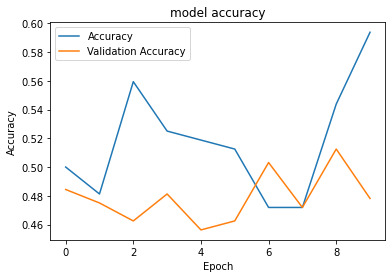

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

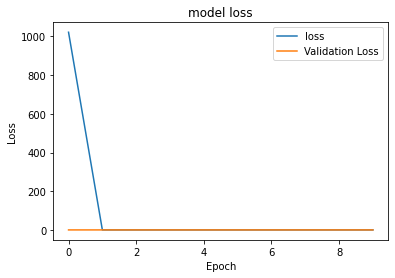

In [26]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [37]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [38]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [41]:
history = model.fit_generator(steps_per_epoch=128,generator=traindata, validation_data= testdata, validation_steps=50,epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10


InvalidArgumentError: ignored